In [1]:
!pip install text2phonemesequence


In [2]:
import torch
from transformers import AutoModel, AutoTokenizer
from text2phonemesequence import Text2PhonemeSequence

# Load XPhoneBERT model and its tokenizer
xphonebert = AutoModel.from_pretrained("vinai/xphonebert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/xphonebert-base")

print(type(xphonebert))
print(type(tokenizer))

# Load Text2PhonemeSequence
text2phone_model = Text2PhonemeSequence(language='eng-us', is_cuda=True)

# Input sequence that is already WORD-SEGMENTED (and text-normalized if applicable)
  
sentence = "This is deep learning project ."

input_phonemes = text2phone_model.infer_sentence(sentence)

input_ids = tokenizer(input_phonemes, return_tensors="pt")

with torch.no_grad():
    outputs = xphonebert(**input_ids)
    phoneme_embeddings = outputs.last_hidden_state  # [1, T, 768]


Some weights of RobertaModel were not initialized from the model checkpoint at vinai/xphonebert-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<class 'transformers.models.roberta.modeling_roberta.RobertaModel'>
<class 'transformers.models.roberta.tokenization_roberta_fast.RobertaTokenizerFast'>


In [3]:
input_phonemes


'ˈð ɪ s ▁ ˈɪ z ▁ ˈd i p ▁ ˈɫ ɝ n ɪ ŋ ▁ ˈp ɹ ɑ d ʒ ɛ k t ▁ .'

In [4]:
input_ids


{'input_ids': tensor([[  0,  72,  12,   9,   4,  48,  27,   4,  99,   8,  21,   4, 135,  67,
           5,  12,  35,   4, 100,  36,  31,  11,  60,  17,  13,   7,   4,  33,
           2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])}

In [5]:
phoneme_embeddings.shape


torch.Size([1, 29, 768])

In [ ]:
torch.max(phoneme_embeddings), torch.min(phoneme_embeddings)


(tensor(3.2162), tensor(-3.5025))

(22272,)


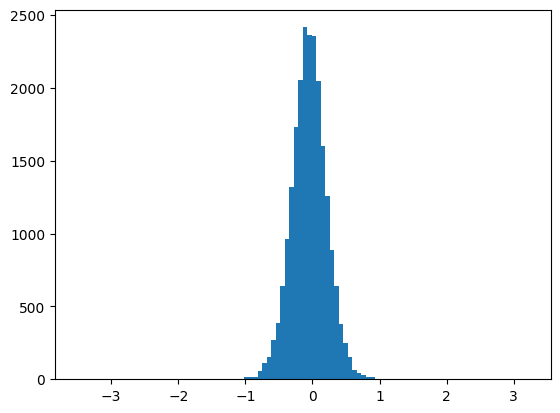

In [ ]:
import matplotlib.pyplot as plt
dist = phoneme_embeddings.reshape(-1).numpy()
print(dist.shape)
plt.hist(dist, bins=100)
plt.show()


In [ ]:
# after normalization

phoneme_embeddings = phoneme_embeddings / torch.norm(phoneme_embeddings, dim=-1, keepdim=True)

torch.max(phoneme_embeddings), torch.min(phoneme_embeddings)


(tensor(0.4388), tensor(-0.5060))